## ICE-10. Image Transforms
Please download the input image from the following link:<br>
https://drive.google.com/file/d/11WCiKcdtXhbhaOnS4Y1VZfZgSQG9zWVo/view?usp=share_link <br><br>

###**Tutorial Fast Fourier Transform**

Step 1: Compute the 2-dimensional Fast Fourier Transform.

Step 2: Shift the zero-frequency component to the center of the spectrum.

Step 3: Inverse of Step 2. Shift the zero-frequency component back to original location

Step 4: Inverse of Step 1. Compute the 2-dimensional inverse Fast Fourier Transform.


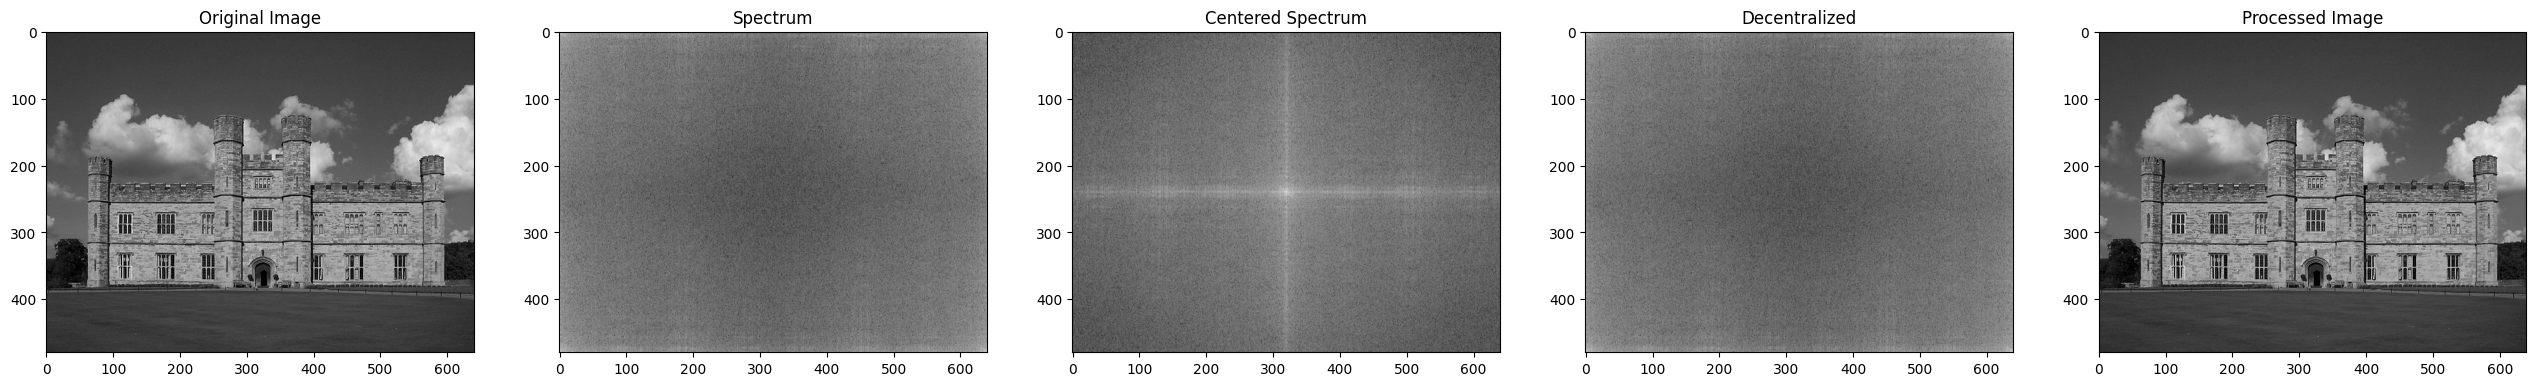

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("001.jpg", 0)
plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(153), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

inv_center = np.fft.ifftshift(center)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_center)), "gray"), plt.title("Decentralized")

processed_img = np.fft.ifft2(inv_center)
plt.subplot(155), plt.imshow(np.abs(processed_img), "gray"), plt.title("Processed Image")

plt.show()

In [2]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base


# Question 1

### What is Fourier Transform ?
### What is Fast Fourier Transform ?
### What is difference between Fast Fourier Transform and Fourier Transform ?
### Which is better FT or FFT ? If so why ?

## Answer Here

## Task 1

### By using above function please plot these filters with proper labels

- Ideal low Pass Filter
- Ideal High Pass Filter

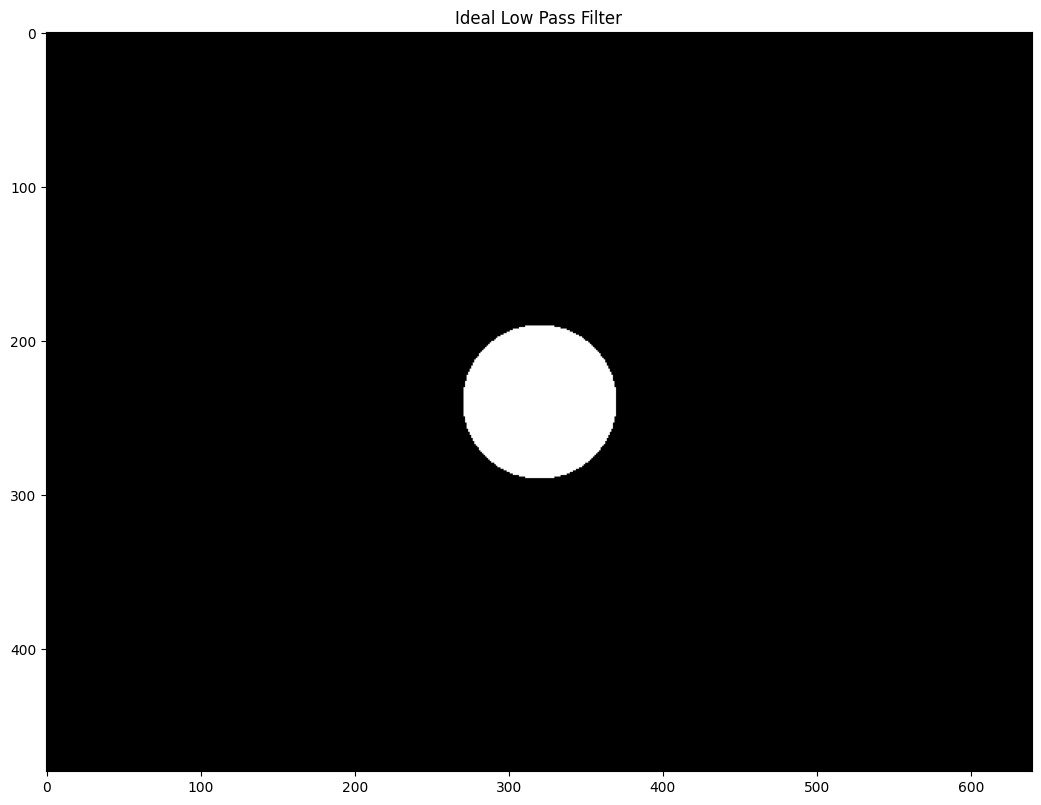

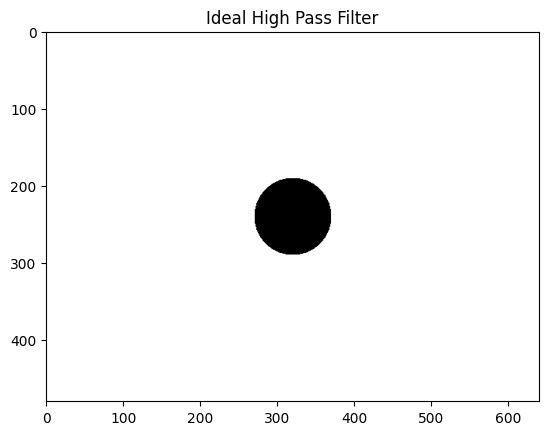

In [3]:
# Load the image and compute the Fourier transform
img = cv2.imread("001.jpg", 0)
original = np.fft.fft2(img)

# Compute the filters with D0 = 50 (you can adjust this value)
D0 = 50
ILPF = idealFilterLP(D0, img.shape)
IHPF = idealFilterHP(D0, img.shape)

# Plot the original image, ILPF, and IHPF
plt.figure(figsize=(6.4 * 7, 4.8 * 2), constrained_layout=False)

plt.imshow(ILPF, "gray"), plt.title("Ideal Low Pass Filter")
plt.show()


plt.imshow(IHPF, "gray"), plt.title("Ideal High Pass Filter")
plt.show()

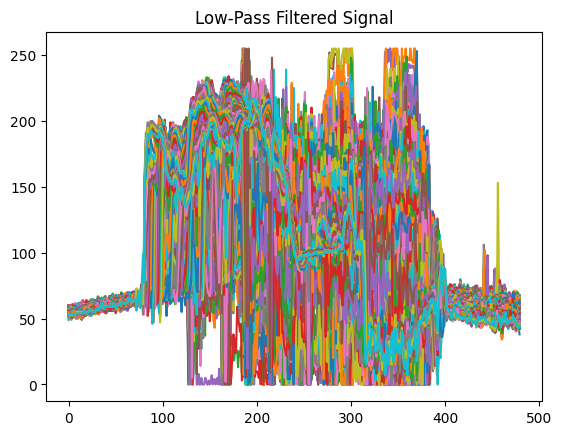

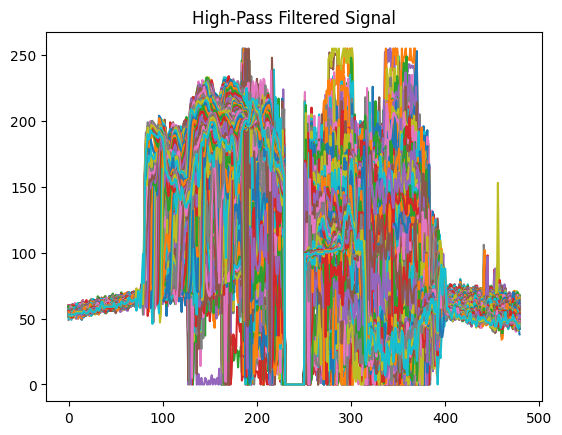

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Low pass filter signals
def low_pass_filter(mydata: np.ndarray, bandlimit: int = 1000, sampling_rate: int = 44100) -> np.ndarray:
    # Calculate the index corresponding to the desired bandlimit frequency
    band_index = int(bandlimit * mydata.size / sampling_rate)

    # Perform Fast Fourier Transform (FFT) to convert the data to frequency domain
    fsig = np.fft.fft(mydata)

    # Set the frequency components above the bandlimit index to zero to perform low-pass filtering
    for i in range(band_index + 1, len(fsig) - band_index):
        fsig[i] = 0

    # Perform Inverse Fast Fourier Transform (IFFT) to convert the filtered data back to the time domain
    mydata_filtered = np.fft.ifft(fsig)

    # Return the real part of the filtered signal (since FFT and IFFT can introduce small imaginary parts)
    return np.real(mydata_filtered)


# High pass filter signals
def high_pass_filter(mydata: np.ndarray, bandlimit: int = 1000, sampling_rate: int = 44100) -> np.ndarray:
    num_samples = len(mydata)

    # Calculate the index corresponding to the desired bandlimit frequency
    band_index = int(bandlimit * num_samples / sampling_rate)

    # Perform Fast Fourier Transform (FFT) to convert the data to frequency domain
    fsig = np.fft.fft(mydata)

    center = num_samples // 2  # Get the center index of the FFT result

    # Set the frequency components within the specified bandlimit to zero to perform high-pass filtering
    for i in range(center - band_index, center + band_index + 1):
        fsig[i] = 0
        fsig[-i] = 0  # Setting the negative frequency component to zero (conjugate symmetry)

    # Perform Inverse Fast Fourier Transform (IFFT) to convert the filtered data back to the time domain
    mydata_filtered = np.fft.ifft(fsig)

    # Return the real part of the filtered signal (since FFT and IFFT can introduce small imaginary parts)
    return np.real(mydata_filtered)


# Example usage of the low-pass filter
img = cv2.imread("001.jpg", 0)
low_pass_filtered = low_pass_filter(img)

plt.title("Low-Pass Filtered Signal")
plt.plot(low_pass_filtered)
plt.show()

# Example usage of the high-pass filter
high_pass_filtered = high_pass_filter(img)

plt.title("High-Pass Filtered Signal")
plt.plot(high_pass_filtered)
plt.show()


## Task 2

### Just like above function of ideal filter , Write functions for the following filters

- Butterworth low Pass Filter
- Butterworth High Pass Filter
- Gaussian low pass Filter
- Gaussian High pass Filter

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp

# Function to compute distance between two points
def distance(point1, point2):
    return sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Butterworth Low Pass Filter
def butterworthFilterLP(D0, imgShape, n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            D = distance((y, x), center)
            base[y, x] = 1 / (1 + (D / D0) ** (2 * n))
    return base

# Butterworth High Pass Filter
def butterworthFilterHP(D0, imgShape, n):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            D = distance((y, x), center)
            if D != 0:  # Avoid division by zero
                base[y, x] = 1 / (1 + (D0 / D) ** (2 * n))
    return base

# Gaussian Low Pass Filter
def gaussianFilterLP(D0, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            D = distance((y, x), center)
            base[y, x] = exp(-(D ** 2) / (2 * D0 ** 2))
    return base

# Gaussian High Pass Filter
def gaussianFilterHP(D0, imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            D = distance((y, x), center)
            base[y, x] = 1 - exp(-(D ** 2) / (2 * D0 ** 2))
    return base

# Example usage:
img = cv2.imread("001.jpg", 0)
original = np.fft.fft2(img)

D0 = 50
n = 2  # For Butterworth filters, this controls the order of the filter

# Compute the filters
BLPF = butterworthFilterLP(D0, img.shape, n)
BHPF = butterworthFilterHP(D0, img.shape, n)
GLPF = gaussianFilterLP(D0, img.shape)
GHPF = gaussianFilterHP(D0, img.shape)


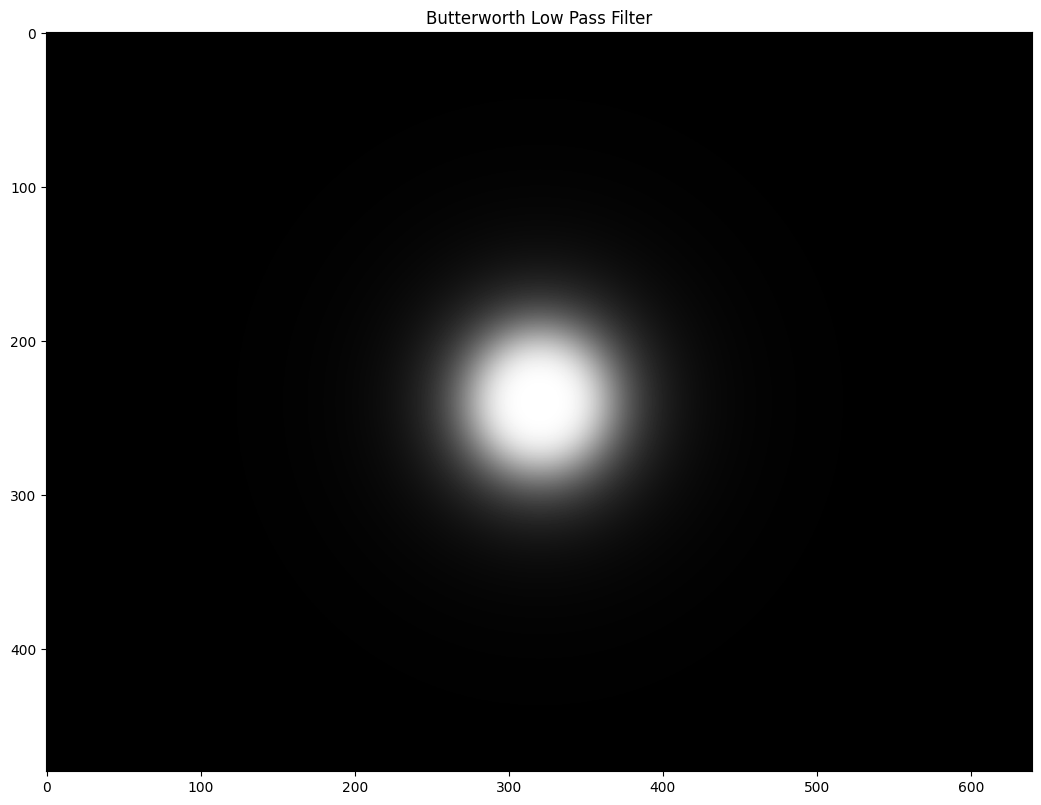

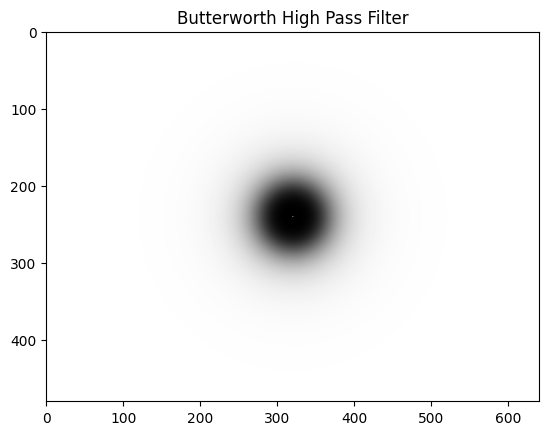

In [11]:
# Plot the filters
plt.figure(figsize=(6.4 * 9, 4.8 * 2), constrained_layout=False)

plt.imshow(BLPF, "gray"), plt.title("Butterworth Low Pass Filter")
plt.show()
plt.imshow(BHPF, "gray"), plt.title("Butterworth High Pass Filter")
plt.show()


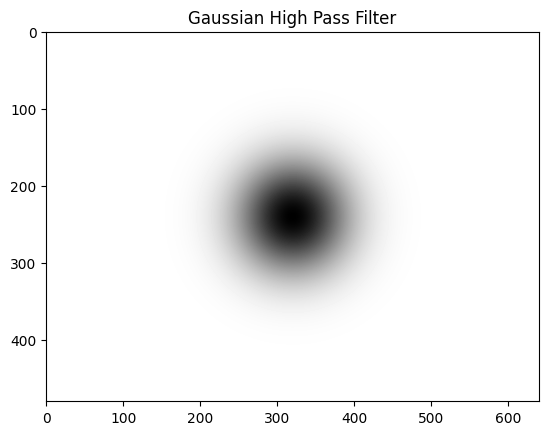

In [ ]:
plt.imshow(GLPF, "gray"), plt.title("Gaussian Low Pass Filter")
plt.show()
plt.imshow(GHPF, "gray"), plt.title("Gaussian High Pass Filter")
plt.show()

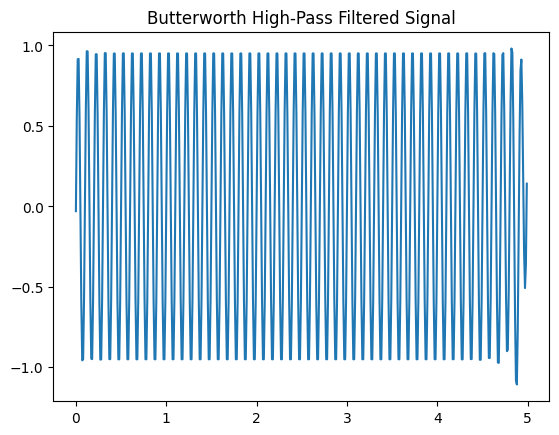

In [12]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

# Function to generate a sine wave
def sine_generator(fs, sinefreq, duration):
    T = duration
    nsamples = fs * T
    w = 2. * np.pi * sinefreq
    t_sine = np.linspace(0, T, nsamples, endpoint=False)
    y_sine = np.sin(w * t_sine)
    result = pd.DataFrame({'data': y_sine}, index=t_sine)
    return result

# Butterworth high-pass filter design
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# Butterworth high-pass filtering
def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

# Butterworth low-pass filter design
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Butterworth low-pass filtering
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

# Gaussian low-pass filter design
def gaussian_lowpass(cutoff, fs, beta=8):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    taps = signal.firwin(numtaps=101, cutoff=normal_cutoff, window=('gaussian', beta))
    return taps

# Gaussian low-pass filtering
def gaussian_lowpass_filter(data, cutoff, fs, beta=8):
    taps = gaussian_lowpass(cutoff, fs, beta=beta)
    y = np.convolve(data, taps, mode='same')
    return y

# Gaussian high-pass filter design
def gaussian_highpass(cutoff, fs, beta=8):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    taps = signal.firwin(numtaps=101, cutoff=normal_cutoff, window=('gaussian', beta), pass_zero=False)
    return taps

# Gaussian high-pass filtering
def gaussian_highpass_filter(data, cutoff, fs, beta=8):
    taps = gaussian_highpass(cutoff, fs, beta=beta)
    y = np.convolve(data, taps, mode='same')
    return y

# Parameters for the sine wave generation
fps = 100  # Sampling frequency in Hz
sine_fq = 10  # Hz
duration = 5  # seconds

# Generate two sine waves with different frequencies
sine_10Hz = sine_generator(fps, sine_fq, duration)

sine_fq = 1  # Hz
sine_1Hz = sine_generator(fps, sine_fq, duration)

# Combine the two sine waves
sine = sine_10Hz + sine_1Hz

# Apply different filters to the combined sine wave
butter_highpass_filtered = butter_highpass_filter(sine.data, 5, fps)
butter_lowpass_filtered = butter_lowpass_filter(sine.data, 20, fps)

gaussian_lowpass_filtered = gaussian_lowpass_filter(sine.data, 15, fps)
gaussian_highpass_filtered = gaussian_highpass_filter(sine.data, 7, fps)

# Plot the original and filtered signals
plt.figure(figsize=(20, 15))

plt.plot(sine.index, sine.data)
plt.title('Generated Signal')
plt.show()

plt.plot(sine.index, butter_highpass_filtered)
plt.title('Butterworth High-Pass Filtered Signal')
plt.show()

plt.plot(sine.index, butter_lowpass_filtered)
plt.title('Butterworth Low-Pass Filtered Signal')
plt.show()

plt.plot(sine.index, gaussian_highpass_filtered)
plt.title('Gaussian High-Pass Filtered Signal')
plt.show()



## Task 3

### By using task 2 functions please plot these filters with proper labels

- Butterworth low Pass Filter for n = 5
- Butterworth High Pass Filter for n = 5
- Butterworth low Pass Filter for n = 20
- Butterworth High Pass Filter for n = 20
- Gaussian Low Pass Filter
- Gaussian High Pass Filter


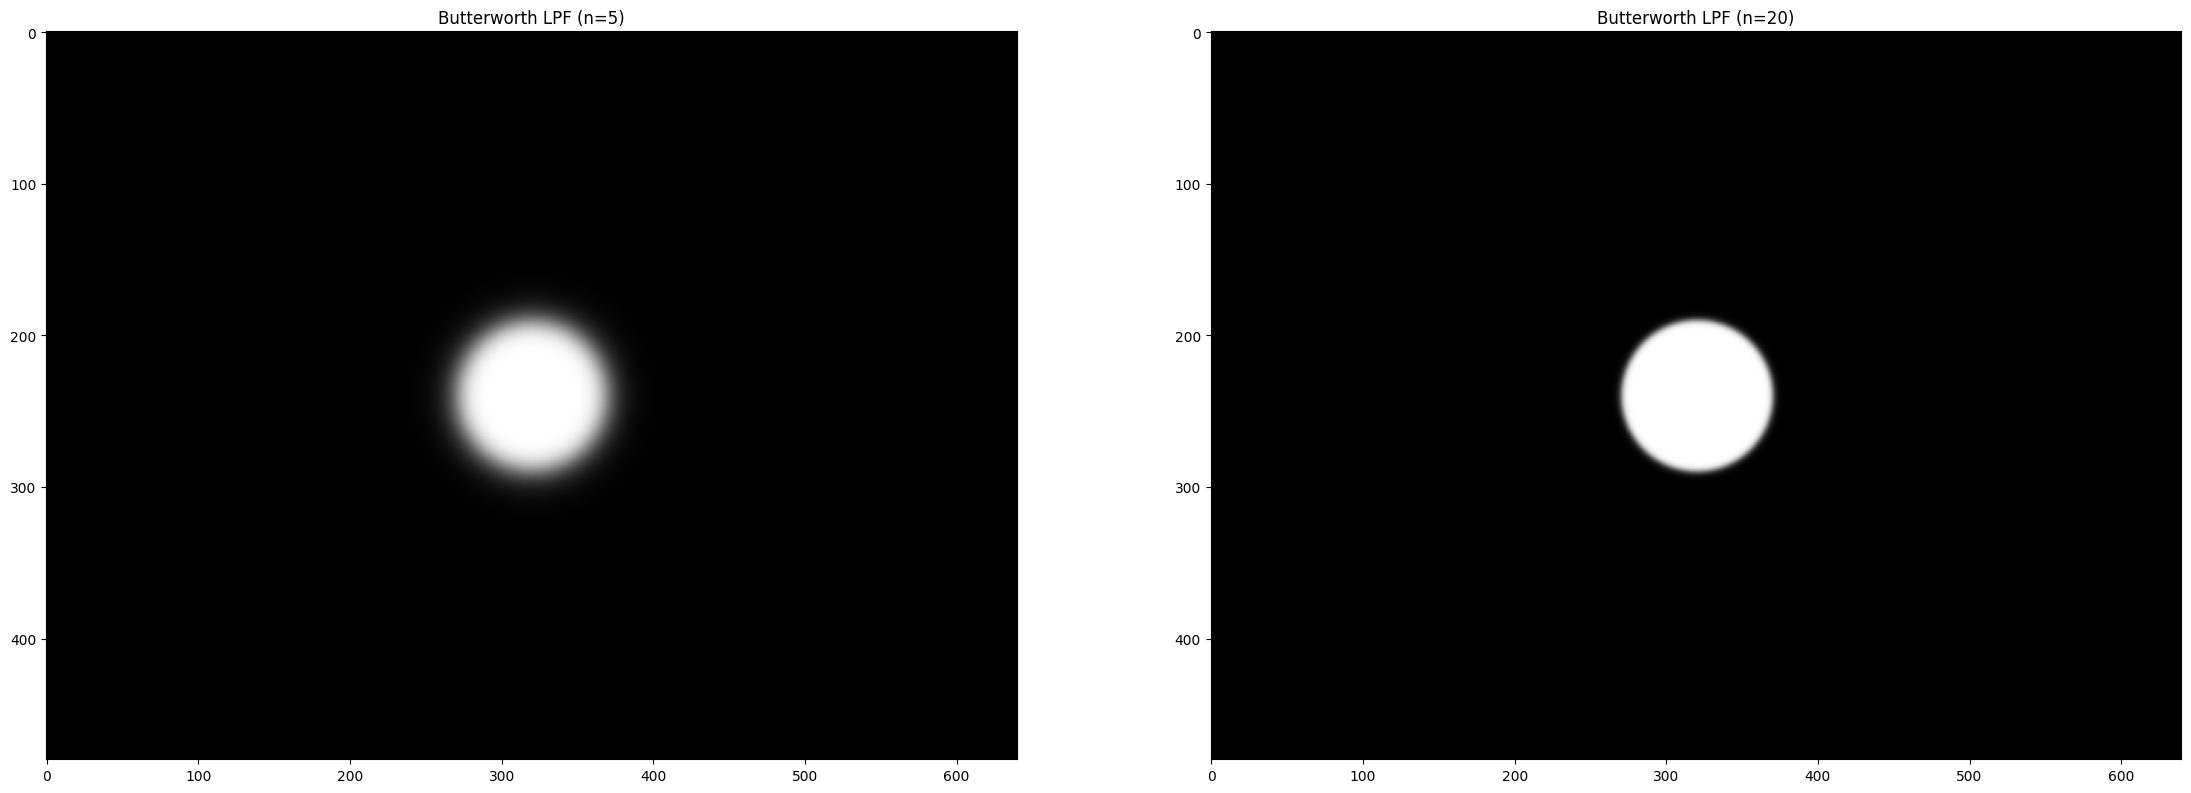

In [13]:
# Example usage:
img = cv2.imread("001.jpg", 0)
original = np.fft.fft2(img)

D0 = 50

# Compute the filters with different values of n
n_values = [5, 20]

plt.figure(figsize=(6.4 * 9, 4.8 * 2), constrained_layout=False)

# Plot Butterworth Low Pass Filters for different n values
for i, n in enumerate(n_values):
    BLPF = butterworthFilterLP(D0, img.shape, n)
    plt.subplot(1, 4, i+1), plt.imshow(BLPF, "gray"), plt.title(f"Butterworth LPF (n={n})")
plt.show()

plt.figure(figsize=(6.4 * 9, 4.8 * 2), constrained_layout=False)

# Plot Butterworth High Pass Filters for different n values
for i, n in enumerate(n_values):
    BHPF = butterworthFilterHP(D0, img.shape, n)
    plt.subplot(1, 4, i+1), plt.imshow(BHPF, "gray"), plt.title(f"Butterworth HPF (n={n})")
plt.show()




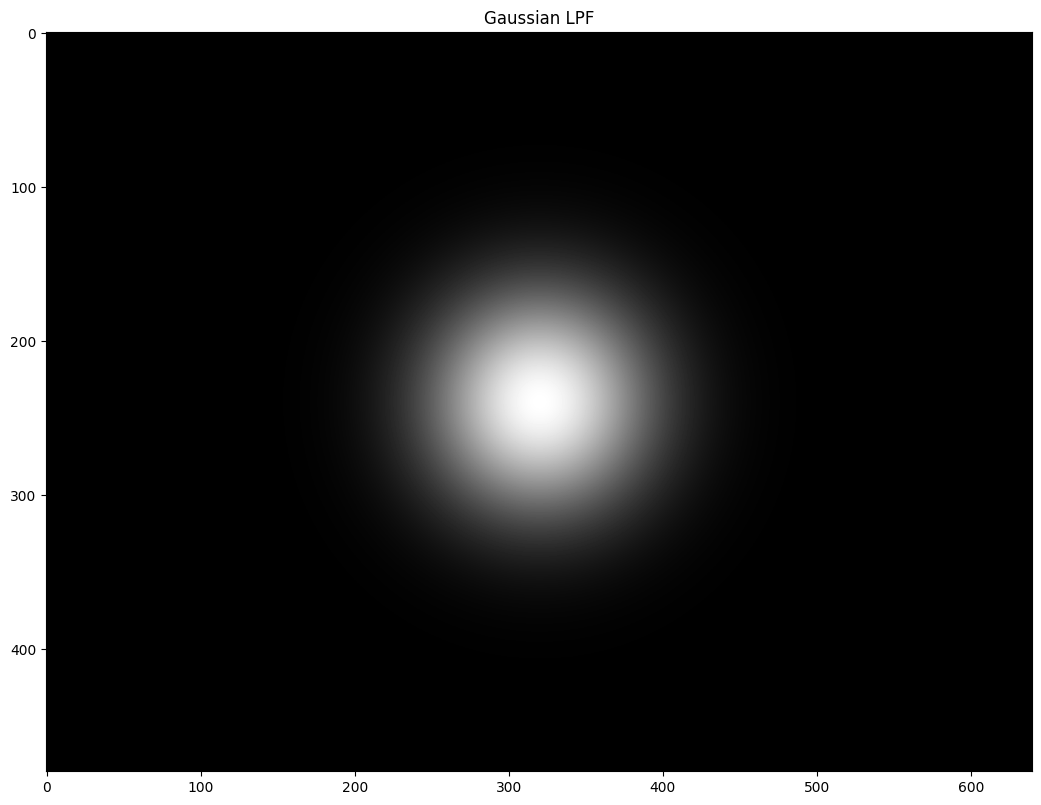

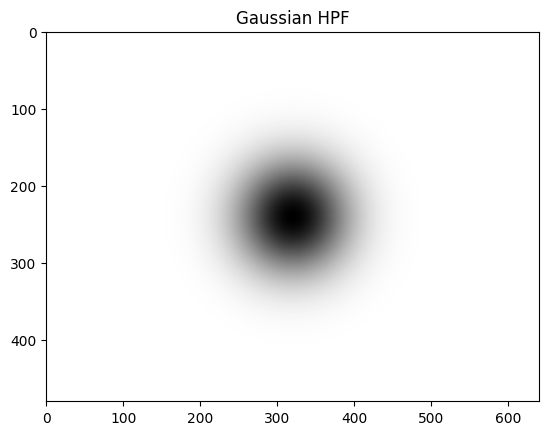

In [14]:
# Compute Gaussian Low Pass and High Pass Filters
GLPF = gaussianFilterLP(D0, img.shape)
GHPF = gaussianFilterHP(D0, img.shape)

plt.figure(figsize=(6.4 * 9, 4.8 * 2), constrained_layout=False)

# Plot Gaussian Low Pass Filter
plt.imshow(GLPF, "gray"), plt.title("Gaussian LPF")
plt.show()
# Plot Gaussian High Pass Filter
plt.imshow(GHPF, "gray"), plt.title("Gaussian HPF")

plt.show()

# Extra for signal processing

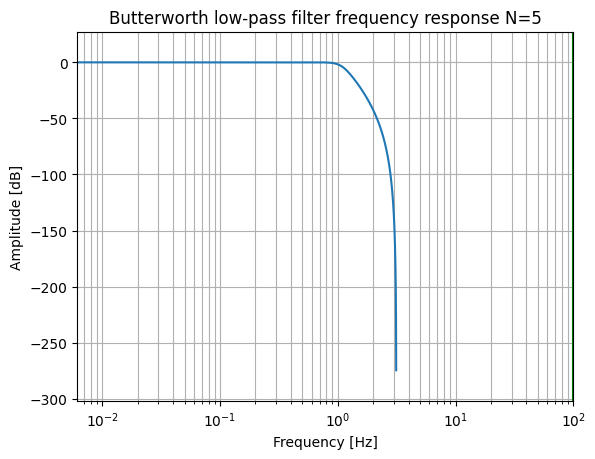

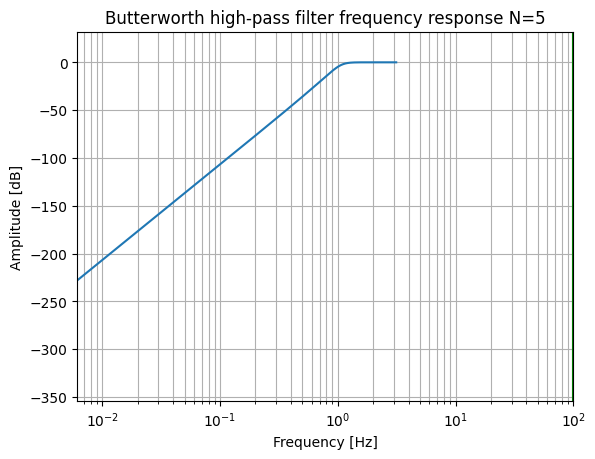

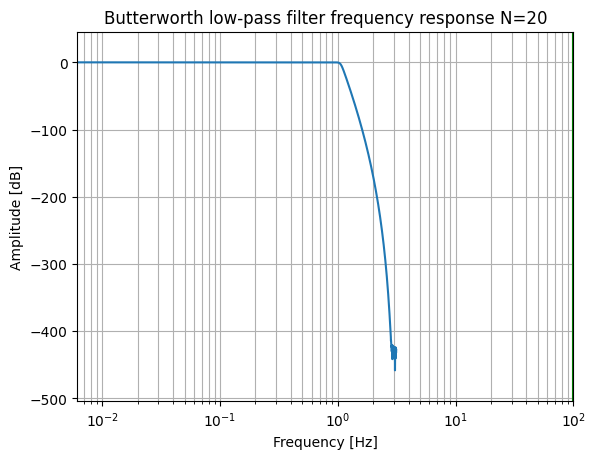

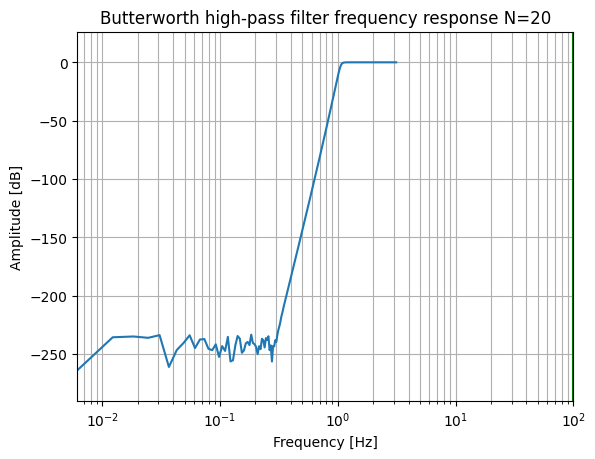

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Function to plot Butterworth low-pass filter frequency response
def blpf(N=10, fs=0.5, Wn=0.585):
    b, a = signal.butter(N, Wn, 'low', True)  # Design Butterworth low-pass filter
    z, p = signal.bilinear(b, a, fs)  # Convert analog filter to digital filter
    w, h = signal.freqz(z, p, 512)  # Compute frequency response
    return w, h

# Function to plot Butterworth high-pass filter frequency response
def bhpf(N=10, fs=0.5, Wn=0.585):
    b, a = signal.butter(N, Wn, 'high', True)  # Design Butterworth high-pass filter
    z, p = signal.bilinear(b, a, fs)  # Convert analog filter to digital filter
    w, h = signal.freqz(z, p, 512)  # Compute frequency response
    return w, h

# Function to apply Gaussian low-pass filter
def glpf(img):
    return cv2.GaussianBlur(img, (5, 5), 0)

# Function to apply Gaussian high-pass filter
def ghpf(img):
    lowpass = cv2.GaussianBlur(img, (5, 5), 0)
    return img - lowpass

# Generate plots for different Butterworth low-pass filter frequency responses

# For N = 5, Low pass
w, h = blpf(N=5)
plt.semilogx(w, 20*np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth low-pass filter frequency response N=5')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')
plt.show()

# For N = 5, High pass
w, h = bhpf(N=5)
plt.semilogx(w, 20*np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth high-pass filter frequency response N=5')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')
plt.show()

# Generate plots for different Butterworth high-pass filter frequency responses

# For N = 20, Low pass
w, h = blpf(N=20)
plt.semilogx(w, 20*np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth low-pass filter frequency response N=20')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')
plt.show()

# For N = 20, High pass
w, h = bhpf(N=20)
plt.semilogx(w, 20*np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth high-pass filter frequency response N=20')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')
plt.show()


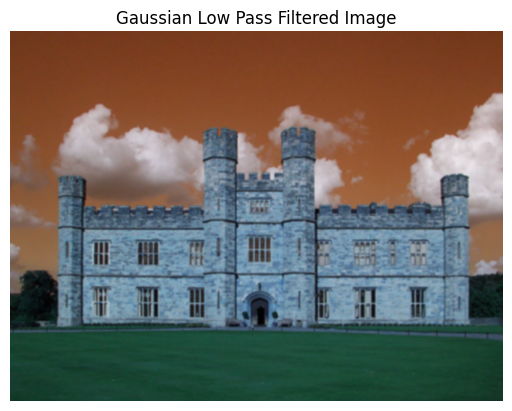

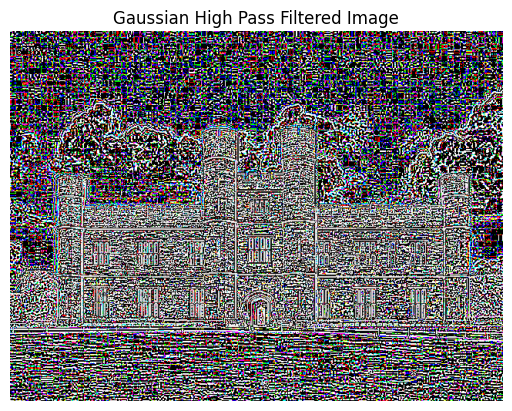

In [16]:

img = cv2.imread("001.jpg")

# Gaussian Low Pass Filter
gaussian_lowpass_filtered = glpf(img)

plt.imshow(gaussian_lowpass_filtered, cmap='gray')
plt.title('Gaussian Low Pass Filtered Image')
plt.axis('off')

plt.show()

# Gaussian High Pass Filter
gaussian_highpass_filtered = ghpf(img)

plt.imshow(gaussian_highpass_filtered, cmap='gray')
plt.title('Gaussian High Pass Filtered Image')
plt.axis('off')

plt.show()

# Question 2

### What is Low pass Filter ?
### Applications of low pass filter ?
### What is high pass Filter ?
### Applications of high pass filter ?

## Answer Here

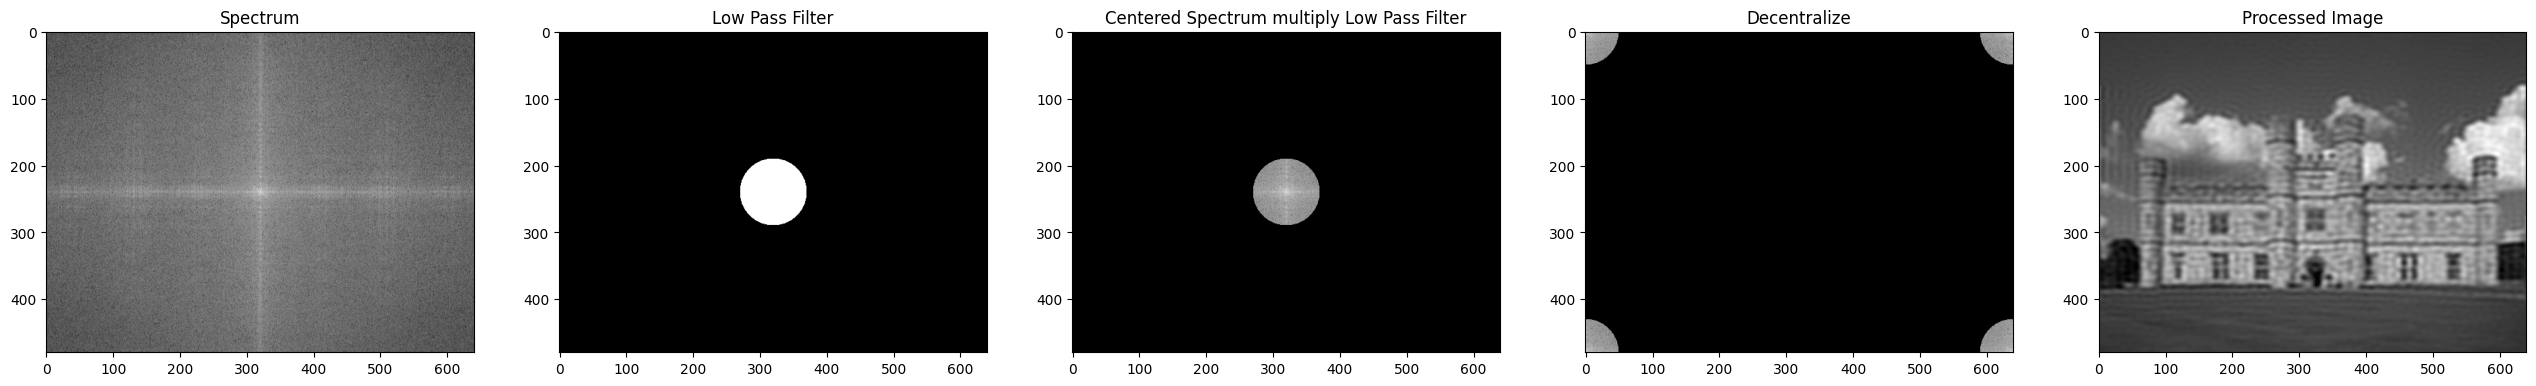

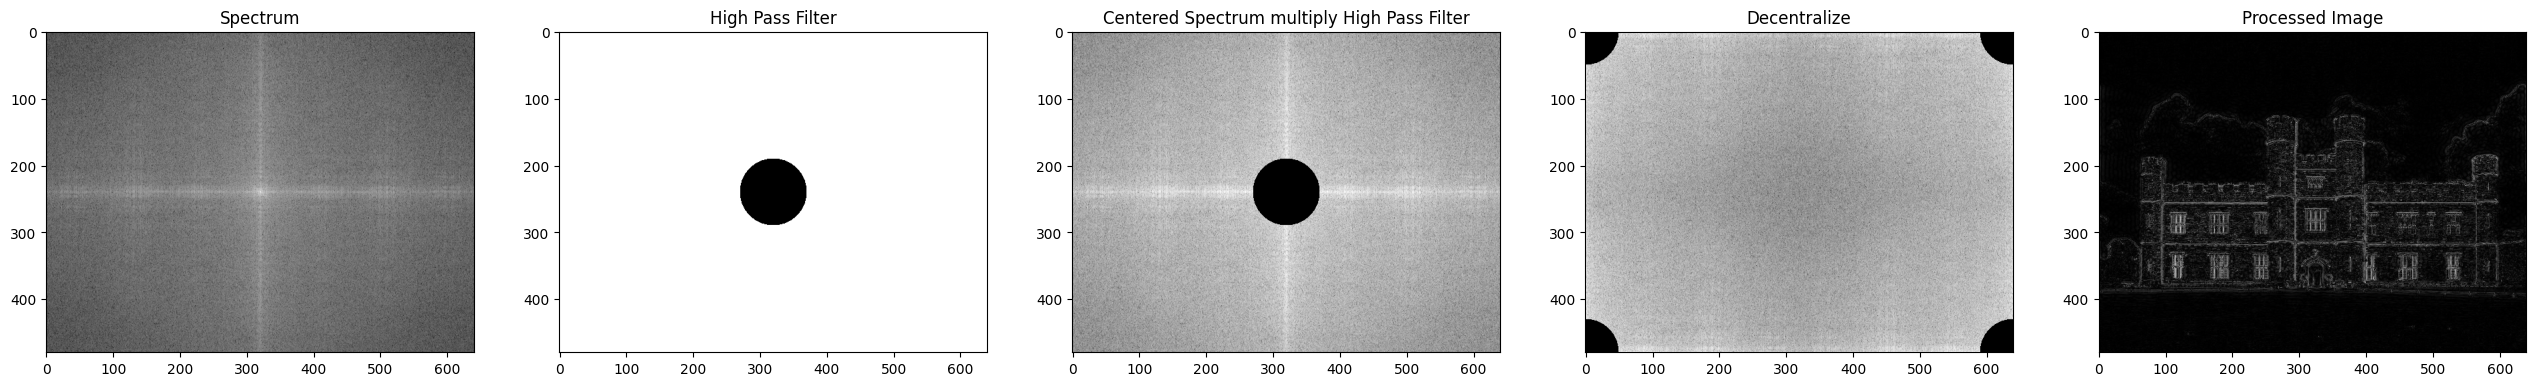

In [18]:
# Tutorial
img = cv2.imread("001.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = idealFilterLP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()
############
print("========================================================================================================================")
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(155), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()



# **Question 3**


## In the task above what is the characteristics of low pass and high pass filter ?

- Explain how the behavoiur change from left image to right image in both the filters
- conclude what each kind of filter does here

## Answer here

## Task 4

### By using task 2 functions write code for High pass centered filters and plot these filters with proper labels

- Ideal High Pass
- Butterworth High Pass (n=15)
- Gaussian High Pass

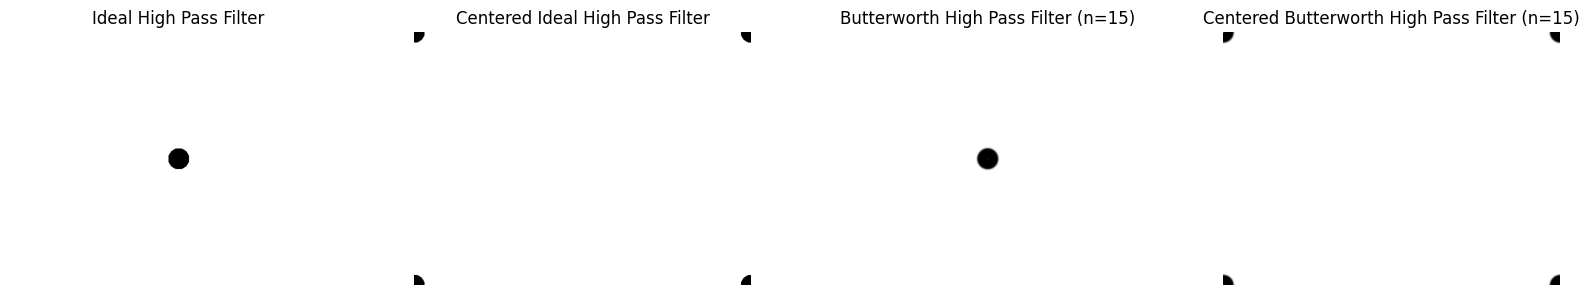

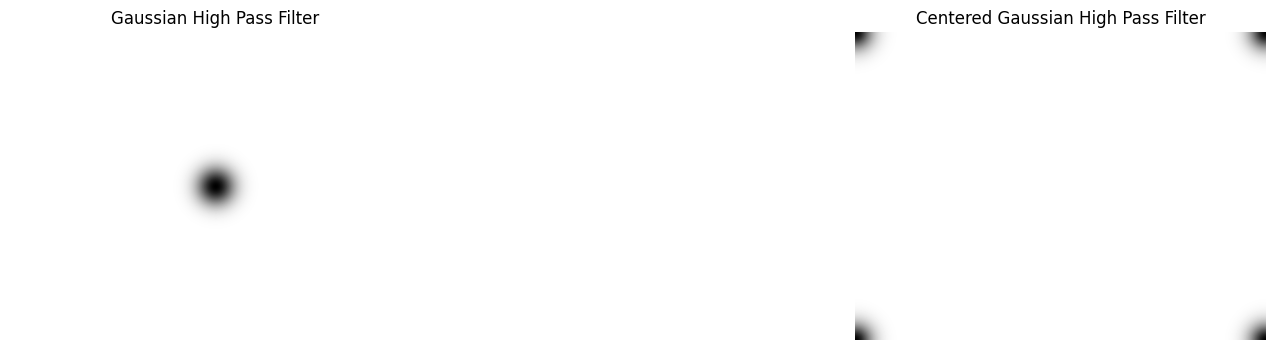

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D0 = 20  # Cutoff frequency for the high pass filters
n = 15  # Order of the Butterworth filter

# Function to compute the centered version of the filter
def center_filter(filter):
    # Apply Fourier shift to center the filter
    centered_filter = np.fft.fftshift(filter)
    return centered_filter

# Compute the filters
IHPF = idealFilterHP(D0, img.shape)
BHPF = butterworthFilterHP(D0, img.shape, n)
GHPF = gaussianFilterHP(D0, img.shape)

# Generate centered versions of the filters
centered_IHPF = center_filter(IHPF)
centered_BHPF = center_filter(BHPF)
centered_GHPF = center_filter(GHPF)

# Plot High Pass Filters
plt.figure(figsize=(20, 4))

# Original Ideal High Pass Filter
plt.subplot(141)
plt.imshow(IHPF, cmap='gray')
plt.title("Ideal High Pass Filter")
plt.axis('off')

# Centered Ideal High Pass Filter
plt.subplot(142)
plt.imshow(np.log(1+np.abs(centered_IHPF)), "gray")
plt.title("Centered Ideal High Pass Filter")
plt.axis('off')

# Original Butterworth High Pass Filter (n=15)
plt.subplot(143)

plt.imshow(BHPF, cmap='gray')
plt.title("Butterworth High Pass Filter (n=15)")
plt.axis('off')

# Centered Butterworth High Pass Filter (n=15)
plt.subplot(144)
plt.imshow(np.log(1+np.abs(centered_BHPF)), "gray")
plt.title("Centered Butterworth High Pass Filter (n=15)")
plt.axis('off')

plt.show()

# Plot Gaussian High Pass Filter
plt.figure(figsize=(20, 4))

# Original Gaussian High Pass Filter
plt.subplot(121)
plt.imshow(GHPF, cmap='gray')
plt.title("Gaussian High Pass Filter")
plt.axis('off')

# Centered Gaussian High Pass Filter
plt.subplot(122)
centered_GHPF = center_filter(GHPF)
plt.imshow(np.log(1+np.abs(centered_GHPF)), "gray")
plt.title("Centered Gaussian High Pass Filter")
plt.axis('off')

plt.show()


# Question 4

### Which has more smooth image , Gaussian filter or Butterworth ?
### Ideal filter , Butterworth filter and Gaussian filter. Distortion is high in which filter among these ?

##Answer here